<div dir=rtl>
ابتدا کتابخانه‌های مورد نیاز را صدا میکنیم تا در ادامه آن‌ها استفاده کنیم.
</div>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

<div dir=rtl>
این قطعه کد برای اتصال گوگل کولب به گوگل درایو است 
</div>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<div dir=rtl>
این قطعه کد فایل اکسل که آپلود کردیم را لود میکند. 
باید ابتدا آدرس جایی که فایل را آنجا در گوگل کولب آپلود کردیم قرار دهیم .
مطابق شکل زیر میبینیم که 5 سطر اول این فایل اکسل به چه صورتی و شامل چه داده‌هایی است.
</div>

In [ ]:
dataFrame = pd.read_csv("/content/gdrive/MyDrive/myProject/diabetes.csv",skipinitialspace=True)

dataFrame.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


<div dir=rtl>
با استفاده از خط کد زیر تمام ستون‌هایی که مقدار نال یا نن دارند و تعداد داده‌های نا برای هر کدام را مشاهده میکنیم و برای آن ستون‌های دارای نال باید کاری کنیم.
</div>

In [ ]:
dataFrame.isna().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<div dir=rtl>
برای هرکدام از ستون‌هایی که در بالا متوجه نال بودن آن‌ها شدیم میبینیم به چه صورت مقدار نال را داخل خور دارد برای اینکار مانند اشکال زیر تمامی ستون‌های دارای نال را میبینیم.
</div>

In [ ]:
dataFrame[dataFrame['Fruits'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div dir=rtl>

</div>

In [ ]:
dataFrame[dataFrame['Physical Health'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div dir=rtl>

</div>

In [ ]:
dataFrame[dataFrame['Difficulty Walking'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000,40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7


<div dir=rtl>

</div>

In [ ]:
dataFrame[dataFrame['Sex'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div dir=rtl>

</div>

In [ ]:
dataFrame[dataFrame['Age'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame[dataFrame['Education'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame[dataFrame['Income'].isna()]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div dir=rtl>
با توجه به اطلاعات بالا میبینیم که سطر 11691 خیلی از ستون‌های نال را شامل میشود پس میتوان آن را حذف کرد.
در کد زیر هر سطری که بیشتر از 8 مودر نال داشته باشد را حذف میکنم. توجه داشته باشید که بعد از حذف سطر برای جلوگیری از اشتباه در مراحل بعدی باید شماره گذاری سطرها را اصلاح کنیم.
</div>

In [ ]:
#Keep only the rows with at least 15 out of 23 non-NA values

dataFrame = dataFrame.dropna(thresh=15)
dataFrame = dataFrame.reset_index(drop=True)

<div dir=rtl>
با حذف این سطر تعداد داده‌های نال خیلی کمتر می‌شود و نیاز به جایگزین کردم کاهش می‌یابد.
</div>

In [ ]:
dataFrame.isna().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       1
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              1
No Doctor because of Cost    1
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           1
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir=rtl>
در کد زیر با استفاده از کتابخانه برای داده‌هایی که حالت باینری دارند داده‌ای را جایگزین می‌کنیم که بیشترین تکرار را در آن ستون دارد که حالتی است که داده‌ی عمومی تر را به جای داده نال قرار میدادیم.
برای داده‌های عددی مثل بی‌ام‌آی هم مقدار میانگین کل ستون را قرار می‌دهیم.
در خطوط پایین‌تر برای incom به مشکل خوردم که بعد متوجه شدم به خاطر وجود  unknown است بنابراین در همین جا قسمت پیش پردازش قرار دادم.
 دراین خط کد مقدار  unknown را با مد کل داده‌های آن ستون جایگزین کردم

چون مقدار Unnamed: 0 در مرحله‌ی نرمالیازی ایجاد مشکل میکند و دارای اعداد پرت و بزرگی است که به درد نرمالسازی نمی‌خورد و بیشتر برای نشان دادن شماره سطر است که ما به جای آن آی‌دی داریم پس ستون مورد نیازی نیست و حذف میگردد.
</div>

In [ ]:
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer.fit(dataFrame.loc[ : , dataFrame.columns == 'Fruits'])
# Repalcing the missing value using transform method
dataFrame.loc[ : , dataFrame.columns == 'Fruits'] = imputer.transform(dataFrame.loc[ : , dataFrame.columns == 'Fruits'])
imputer.fit(dataFrame.loc[ : , dataFrame.columns == 'No Doctor because of Cost'])
dataFrame.loc[ : , dataFrame.columns == 'No Doctor because of Cost'] = imputer.transform(dataFrame.loc[ : , dataFrame.columns == 'No Doctor because of Cost'])
imputer.fit(dataFrame.loc[ : , dataFrame.columns == 'Any Health Care'])
dataFrame.loc[ : , dataFrame.columns == 'Any Health Care'] = imputer.transform(dataFrame.loc[ : , dataFrame.columns == 'Any Health Care'])
imputer.fit(dataFrame.loc[ : , dataFrame.columns == 'Difficulty Walking'])
dataFrame.loc[ : , dataFrame.columns == 'Difficulty Walking'] = imputer.transform(dataFrame.loc[ : , dataFrame.columns == 'Difficulty Walking'])

imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer_mean.fit(dataFrame.loc[ : , dataFrame.columns == 'BMI'])
dataFrame.loc[ : , dataFrame.columns == 'BMI'] = imputer_mean.transform(dataFrame.loc[ : , dataFrame.columns == 'BMI'])
## Unknown income
dataFrame['Income'] = dataFrame['Income'].replace(['Unknown'],dataFrame['Income'].mode())

dataFrame = dataFrame.drop(['Unnamed: 0'], axis=1)

<div dir=rtl>
همانطور که مشاهده میشود داده‌های تمیز را داریم که هیچ مقدار نالی ندارند.
</div>

In [ ]:
dataFrame.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir=rtl>
حالا فاصله‌ی بین نام هر ستون را با  _ جایگزین می‌کنیم.
</div>

In [ ]:
dataFrame.columns = dataFrame.columns.str.replace(' ', '_')
dataFrame

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70687,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70688,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70689,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


<div dir=rtl>
در این قسمت برای داده‌های کتگوریکال از  one hot coding استفاده کردم.
برای هر کدام تمام کتوگوری‌ها به جای ستون اصلی قرار میگیرد و اگر مربوط به کتگوری باشد مقدار 1 و برای بقیه کتگوری‌های آن ستون مقدار 0 قرار میگیرد.
جدول زیر حالت کلی را نشان می‌دهد که ستون‌های زیادی اضافه شدند.
</div>

In [ ]:
df_new = dataFrame.loc[ : , dataFrame.columns != 'General_Health']

one_hot_encoder = preprocessing.OneHotEncoder()
General_Health_one_hot = one_hot_encoder.fit_transform(dataFrame['General_Health'].values.reshape(-1,1)).toarray()

target_types = ['General_Health_Medium' ,'General_Health_High', 'General_Health_Good','General_Health_Low','General_Health_Very_Low']
General_Health_one_hot = pd.DataFrame(General_Health_one_hot , columns = target_types)

df_new = df_new.join(General_Health_one_hot)

###################################################
df_new = df_new.loc[ : , df_new.columns != 'Sex']
one_hot_encoder = preprocessing.OneHotEncoder()
General_Health_one_hot = one_hot_encoder.fit_transform(dataFrame['Sex'].values.reshape(-1,1)).toarray()

target_types = ['male' ,'female']
General_Health_one_hot = pd.DataFrame(General_Health_one_hot , columns = target_types)

df_new = df_new.join(General_Health_one_hot)

##################################################
df_new = df_new.loc[ : , df_new.columns != 'Education']
one_hot_encoder = preprocessing.OneHotEncoder()
General_Health_one_hot = one_hot_encoder.fit_transform(dataFrame['Education'].values.reshape(-1,1)).toarray()

target_types = ['Education_Cat1' ,'Education_Cat2', 'Education_Cat3','Education_Cat4','Education_Cat5','Education_Cat6']
General_Health_one_hot = pd.DataFrame(General_Health_one_hot , columns = target_types)

df_new = df_new.join(General_Health_one_hot)

# ##################################################
df_new = df_new.loc[ : , df_new.columns != 'Income']
one_hot_encoder = preprocessing.OneHotEncoder()
General_Health_one_hot = one_hot_encoder.fit_transform(dataFrame['Income'].values.reshape(-1,1)).toarray()

target_types = ['Income_Cat1' ,'Income_Cat2', 'Income_Cat3','Income_Cat4','Income_Cat5','Income_Cat6' ,'Income_Cat7', 'Income_Cat8']
General_Health_one_hot = pd.DataFrame(General_Health_one_hot , columns = target_types)

df_new = df_new.join(General_Health_one_hot)


df_new

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70687,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70689,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<div dir=rtl>
برای استاندارد سازی تمام داده‌های ایجاد شده را با کتابخانه به یک رنج نرمال شده میبریم.  نرمالسازی را برای ستون مربوط به برچسب انجام نمیدهیم چون ستونی است که هدف را مشحص می‌کند و نیازی به نرمال شدن ندارد.
</div>

In [ ]:
scaler = preprocessing.StandardScaler()
df_new.iloc[:,1:] = scaler.fit_transform(df_new.iloc[:,1:])
df_new

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,0.880187,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,-1.255357,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
1,0.0,0.880187,0.949836,0.159277,-0.542174,1.050725,3.883866,-0.416474,-1.538623,0.796586,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
2,0.0,-1.136122,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,0.796586,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
3,0.0,0.880187,0.949836,0.159277,-0.261036,1.050725,-0.257475,-0.416474,0.649932,0.796586,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
4,0.0,-1.136122,-1.052814,0.159277,-0.120467,1.050725,-0.257475,-0.416474,0.649932,0.796586,...,1.590364,-0.763181,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,1.0,-1.136122,0.949836,0.159277,1.004085,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,...,-0.628787,-0.763181,4.310055,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,-0.642300
70687,1.0,-1.136122,0.949836,0.159277,-0.120467,1.050725,-0.257475,2.401111,-1.538623,0.796586,...,-0.628787,-0.763181,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,2.423196,-0.439061,-0.642300
70688,1.0,0.880187,0.949836,0.159277,-0.682743,-0.951723,-0.257475,2.401111,-1.538623,0.796586,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,3.101202,-0.357477,-0.412678,-0.439061,-0.642300
70689,1.0,0.880187,0.949836,0.159277,-1.666727,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,...,-0.628787,-0.763181,-0.232016,-0.260678,-0.292061,3.101202,-0.357477,-0.412678,-0.439061,-0.642300


<div dir=rtl>
ستون داده‌های برچسب و داده‌های عادی را از هم تفکیک کردم.
</div>

In [ ]:
# importing an array of features
x = df_new.loc[ : , df_new.columns != 'Diabetes_binary']

# importing an array of dependent variable -----> Lable
y = df_new.loc[ : , df_new.columns == 'Diabetes_binary']

display(x)

print("\n")

display(y)

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.880187,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,-1.255357,0.517489,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
1,0.880187,0.949836,0.159277,-0.542174,1.050725,3.883866,-0.416474,-1.538623,0.796586,-1.932407,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
2,-1.136122,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,0.796586,0.517489,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
3,0.880187,0.949836,0.159277,-0.261036,1.050725,-0.257475,-0.416474,0.649932,0.796586,0.517489,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
4,-1.136122,-1.052814,0.159277,-0.120467,1.050725,-0.257475,-0.416474,0.649932,0.796586,0.517489,...,1.590364,-0.763181,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,-1.136122,0.949836,0.159277,1.004085,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,0.517489,...,-0.628787,-0.763181,4.310055,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,-0.642300
70687,-1.136122,0.949836,0.159277,-0.120467,1.050725,-0.257475,2.401111,-1.538623,0.796586,0.517489,...,-0.628787,-0.763181,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,2.423196,-0.439061,-0.642300
70688,0.880187,0.949836,0.159277,-0.682743,-0.951723,-0.257475,2.401111,-1.538623,0.796586,-1.932407,...,-0.628787,1.310305,-0.232016,-0.260678,-0.292061,3.101202,-0.357477,-0.412678,-0.439061,-0.642300
70689,0.880187,0.949836,0.159277,-1.666727,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,-1.932407,...,-0.628787,-0.763181,-0.232016,-0.260678,-0.292061,3.101202,-0.357477,-0.412678,-0.439061,-0.642300


,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70686,1.0
70687,1.0
70688,1.0
70689,1.0


<div dir=rtl>
<h2>ساخت مدل طبقه‌بند</h2>
داده‌های  train , test را با نسبت 0.2 جدا میکنیم یعنی 20 درصد از داده‌ها برای تست به صورت رندم کنار گذاشته می‌شوند.
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train.shape

(56552, 38)

<div dir=rtl>
 classifier را با توجه به کتابخانه و مقادیر گفته شده برای هر مولفه ایجاد میکنیم و روی 10 دوری که تغییری نداشتیم یادگیری را خاتمه می‌دهیم.
</div>

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1 , Max_depth=4 ,N_estimator=200 , Subsample=0.5 ,Colsample_bytree=1 , Random_seed=123 ,Eval_metric="auc" , Verbosity=1)

model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.300591	validation_1-error:0.294858
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.289521	validation_1-error:0.286937
[2]	validation_0-error:0.279	validation_1-error:0.276964
[3]	validation_0-error:0.284605	validation_1-error:0.283754
[4]	validation_0-error:0.278717	validation_1-error:0.277672
[5]	validation_0-error:0.279407	validation_1-error:0.278662
[6]	validation_0-error:0.280202	validation_1-error:0.278733
[7]	validation_0-error:0.27785	validation_1-error:0.275762
[8]	validation_0-error:0.272457	validation_1-error:0.271518
[9]	validation_0-error:0.271891	validation_1-error:0.271236
[10]	validation_0-error:0.270229	validation_1-error:0.267629
[11]	validation_0-error:0.267011	validation_1-error:0.263385
[12]	validation_0-error:0.266268	validation_1-error:0.262678
[13]	validation_0-error:0.263315	validation_1-error:0.260485

XGBClassifier(Colsample_bytree=1, Eval_metric='auc', Max_depth=4,
              N_estimator=200, Random_seed=123, Subsample=0.5, Verbosity=1)

<div dir=rtl>
با کتابخانه مقادیر دقت و صحت و معیار دیگر را برای داده‌های یادگیری پیش بینی شده و تفاوت آن با مقدار واقعی بدست می‌آوریم.
</div>

In [ ]:
from sklearn.metrics import accuracy_score ,precision_score , recall_score , plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix , classification_report

# make predictions for test data
y_pred_train = model.predict(X_train)
predictions = [round(value) for value in y_pred_train]
# evaluate predictions
accuracy_train = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))


# evaluate predictions
recall_train = recall_score(y_train, predictions)
print("recall: %.2f%%" % (recall_train * 100.0))


# evaluate predictions
precision_train = precision_score(y_train, predictions)
print("precision: %.2f%%" % (precision_train * 100.0))

Accuracy: 75.13%
recall: 79.58%
precision: 73.17%


<div dir=rtl>
ماتریس درهم ریختگی را با کتابخانه برای داده‌های  train در زیر داریم که میبینیم چه مقدار داده را به درستی یا به غلط پیش بینی کردیم 
مثلا 8273 داده بوده اند که برچسب واقعی آن‌ها 0 بوده ولی ما به غلظ 1 پیش بینی کردیم.
</div>

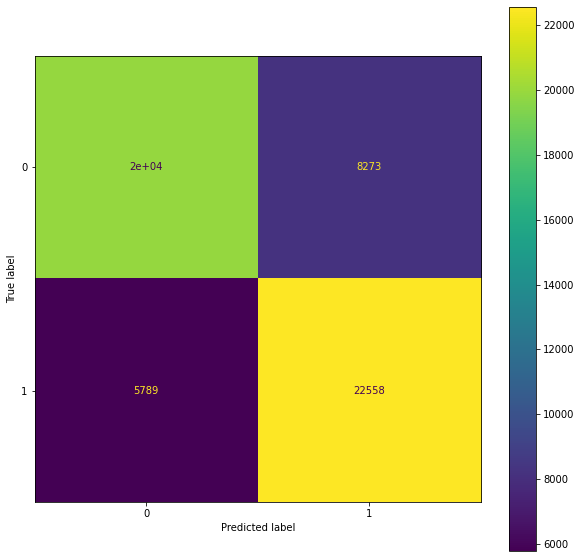

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, y_pred_train) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)

#plotting in customized size
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

<div dir=rtl>
تمام روند گفته شده برای محاسبه‌ی دقت و ماتریس درهم ریختگی را برای داده‌های تست هم تکرار میکنیم و نتیجه را مشاهده می‌کنیم
دقت داده‌های تست خیلی نزدیک به داده‌های یادگیری است و این نشان می‌دهد که مدل به خوبی یادگرفته و روی داده تست درست مانند حالتی که روی  train بوده دقت دارد.
</div>

In [ ]:
y_pred_test = model.predict(X_test)
predictions_test = [round(value) for value in y_pred_test]

from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))


# evaluate predictions
recall_test = recall_score(y_test, predictions_test)
print("recall: %.2f%%" % (recall_test * 100.0))


# evaluate predictions
precision_test = precision_score(y_test, predictions_test)
print("precision: %.2f%%" % (precision_test * 100.0))

Accuracy: 75.63%
recall: 79.78%
precision: 73.34%


<div dir=rtl>
ماتریس درهم ریختگی برای داده‌های تست
</div>

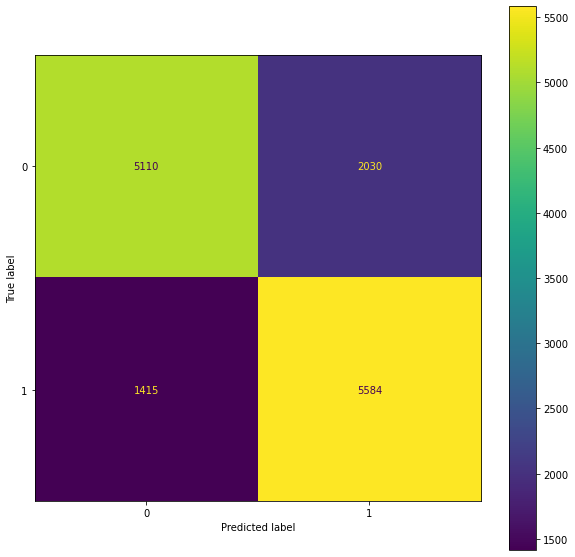

In [ ]:
cm = confusion_matrix(y_test, y_pred_test) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)

#plotting in customized size
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

<div dir=rtl>
تعداد پارامترهایی که برای این دسته‌بند داریم زیاد است که تمام آن‌ها را در زیر میبینیم.
</div>

In [ ]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

<div dir=rtl>
تابع گفته شده در دستور کار 
</div>

In [ ]:
def my_roc_auc_score(model, X, y):
   return roc_auc_score(y, model.predict_proba(X)[:,1])

<div dir=rtl>
به کمک کتابخانه‌ی گفته شده در دستور کار و لیستی که برای پارامترها داریم بهترین حالت ممکن که بیشترین امتیاز را دارد برای پارامترها بدست می‌آوریم

 The best score across ALL searched params:
 0.8290009246123548

 The best parameters across ALL searched params:
 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
 
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = [{'learning_rate': [0.02, 0.05, 0.1, 0.3],
         'Max_depth': [2, 3, 4],
         'N_estimator': [100, 200, 300],
         'Colsample_bytree' : [0.8, 1]
         
         }]

kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=20)

model_ = XGBClassifier(Eval_metric="auc" ,Subsample=0.5)

grid_search = GridSearchCV(
    estimator=model_,
    param_grid=params,
    scoring = my_roc_auc_score,
    cv = kfold,
    verbose=True
)

	

grid_search.fit(X_train, y_train)


grid_search.best_params_

# Root Mean Squared Error
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(Colsample_bytree=0.8, Eval_metric='auc', Max_depth=2,
              N_estimator=100, Subsample=0.5)

 The best score across ALL searched params:
 0.8290009246123548

 The best parameters across ALL searched params:
 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}


<div dir=rtl>
با توجه به بهترین پارامترهایی که به کمک کتابخانه از لیست انتخاب کردیم یادگیری را دوباره برای مدل پیاده سازی میکنیم تا بهترین مدل یادگیری شده را بدهد.
</div>

In [ ]:
best_model = XGBClassifier(Colsample_bytree=0.8,Max_depth=2,N_estimator=100,learning_rate=0.1 ,Eval_metric="auc" ,Subsample=0.5)

best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10) 

XGBClassifier().get_params()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.300591	validation_1-error:0.294858
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.289521	validation_1-error:0.286937
[2]	validation_0-error:0.279	validation_1-error:0.276964
[3]	validation_0-error:0.284605	validation_1-error:0.283754
[4]	validation_0-error:0.278717	validation_1-error:0.277672
[5]	validation_0-error:0.279407	validation_1-error:0.278662
[6]	validation_0-error:0.280202	validation_1-error:0.278733
[7]	validation_0-error:0.27785	validation_1-error:0.275762
[8]	validation_0-error:0.272457	validation_1-error:0.271518
[9]	validation_0-error:0.271891	validation_1-error:0.271236
[10]	validation_0-error:0.270229	validation_1-error:0.267629
[11]	validation_0-error:0.267011	validation_1-error:0.263385
[12]	validation_0-error:0.266268	validation_1-error:0.262678
[13]	validation_0-error:0.263315	validation_1-error:0.260485

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

<div dir=rtl>
روی مدل جدید مانند حالت قبلی دقت را روی داده‌های  train tets بدست می‌آوریم و ماتریس درهم ریختگی آن را نیز رسم می‌کنیم.
</div>

In [ ]:
# make predictions for test data
y_pred_train_best = best_model.predict(X_train)
predictions_best = [round(value) for value in y_pred_train_best]
# evaluate predictions
accuracy_train_best = accuracy_score(y_train, predictions_best)
print("Accuracy: %.2f%%" % (accuracy_train_best * 100.0))


# evaluate predictions
recall_train_best = recall_score(y_train, predictions_best)
print("recall: %.2f%%" % (recall_train_best * 100.0))


# evaluate predictions
precision_train_best = precision_score(y_train, predictions_best)
print("precision: %.2f%%" % (precision_train_best * 100.0))

Accuracy: 75.13%
recall: 79.58%
precision: 73.17%


<div dir=rtl>

</div>

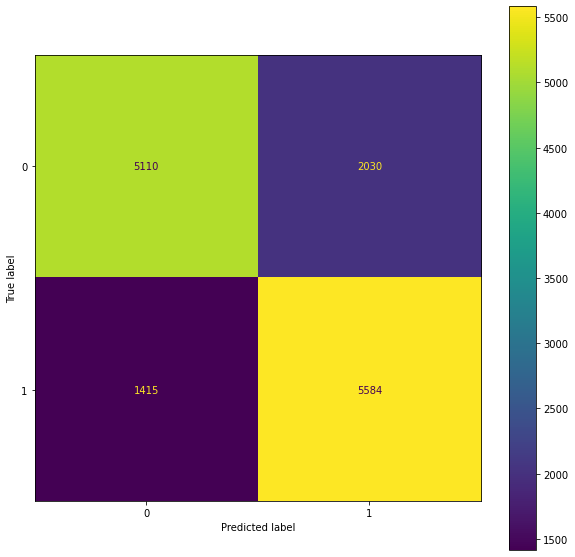

In [ ]:
cm_best = confusion_matrix(y_train, y_pred_train_best) 
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm)

#plotting in customized size
fig, ax = plt.subplots(figsize=(10,10))
disp_best.plot(ax=ax);

<div dir=rtl>

</div>

In [ ]:
y_pred_test_best = best_model.predict(X_test)
predictions_test_best = [round(value) for value in y_pred_test_best]

# evaluate predictions
accuracy_test_best = accuracy_score(y_test, predictions_test_best)
print("Accuracy: %.2f%%" % (accuracy_test_best * 100.0))


# evaluate predictions
recall_test_best = recall_score(y_test, predictions_test_best)
print("recall: %.2f%%" % (recall_test_best * 100.0))


# evaluate predictions
precision_test_best = precision_score(y_test, predictions_test_best)
print("precision: %.2f%%" % (precision_test_best * 100.0))

Accuracy: 75.63%
recall: 79.78%
precision: 73.34%


<div dir=rtl>

</div>

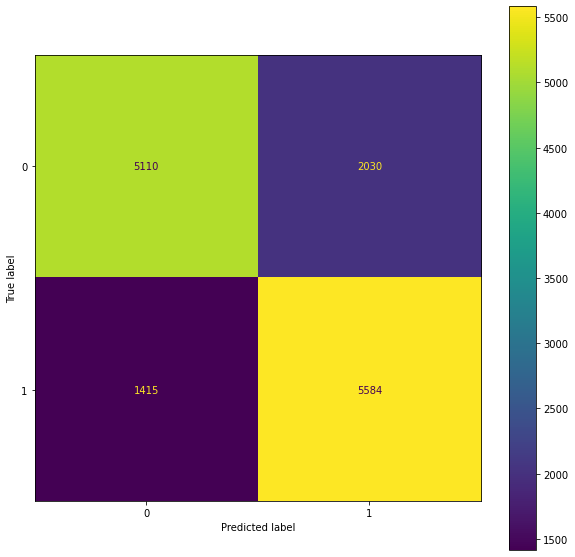

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_best) 
disp_best_test = ConfusionMatrixDisplay(confusion_matrix=cm)

#plotting in customized size
fig, ax = plt.subplots(figsize=(10,10))
disp_best_test.plot(ax=ax);

<div dir=rtl>
همانطور که از دقت موارد بالا میبینیم دقت ما افزایش چشم‌گیری نداشته و با اینکه پارامترهای بهتری را قرار دادیم ولی تغییرات زیاد نبوده این یعنی مدل اولیه ما هم دارای پارمترهای به نسبت خوبی بوده است.
در زیر نمودارهادی مربوط به تغییر هرکدام از مولفه‌ها و تاثیر آن روی امتیاز را میبینیم که همانطور که قابل مشاهده است تنها موردی که تفاوتی در امتیاز اییجاد می‌کند  learning rate است و بقیه موارد با تغییرشان هیچ تفاوتی در امتیاز ندارند.
</div>

Best: 0.829001 using {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8178444903365811 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.02}
0.8265993528793528 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.05}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8281673890995783 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.3}


Text(0, 0.5, 'mean score')

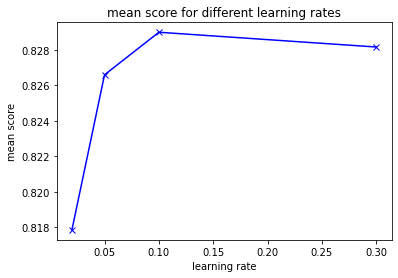

In [ ]:
import matplotlib
from matplotlib import pyplot

matplotlib.use('Agg')

learning_rate = [0.02, 0.05, 0.1, 0.3]
Max_depth = [2, 3, 4]
N_estimator = [100, 200, 300]
Colsample_bytree  = [0.8, 1]

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']


temp_array = []
for mean, param in zip(means, params):
  if param["Max_depth"]==grid_search.best_params_['Max_depth'] and param["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] and param["N_estimator"]==grid_search.best_params_['N_estimator'] :    
    temp_array.append(mean)
    print("%r %r" % (mean, param))

# plot
plt.plot(learning_rate, temp_array, 'bx-')

plt.title('mean score for different learning rates')
plt.xlabel('learning rate')
plt.ylabel('mean score')



<div dir=rtl>

</div>

Best: 0.829001 using {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 3, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 4, 'N_estimator': 100, 'learning_rate': 0.1}


Text(0, 0.5, 'mean score')

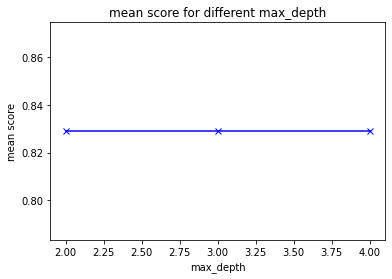

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

temp_array = []
for mean, param in zip(means, params):
  if param["learning_rate"]== grid_search.best_params_['learning_rate'] and param["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] and param["N_estimator"]==grid_search.best_params_['N_estimator'] :    
    temp_array.append(mean)
    print("%r %r" % (mean, param))
 
# plot
plt.plot(Max_depth, temp_array, 'bx-')

plt.title('mean score for different max_depth')
plt.xlabel('max_depth')
plt.ylabel('mean score')

<div dir=rtl>

</div>

Best: 0.829001 using {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 200, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 300, 'learning_rate': 0.1}


Text(0, 0.5, 'mean score')

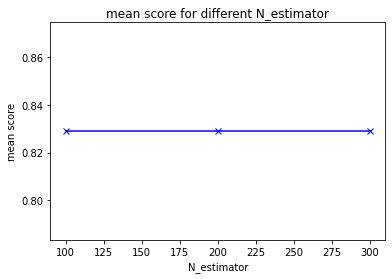

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

temp_array = []
for mean, param in zip(means, params):
  if param["learning_rate"]== grid_search.best_params_['learning_rate'] and param["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] and param["Max_depth"]==grid_search.best_params_['Max_depth'] :    
    temp_array.append(mean)
    print("%r %r" % (mean, param))
 
# plot
plt.plot(N_estimator, temp_array, 'bx-')

plt.title('mean score for different N_estimator')
plt.xlabel('N_estimator')
plt.ylabel('mean score')

<div dir=rtl>

</div>

Best: 0.829001 using {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}
0.8290009246123548 {'Colsample_bytree': 1, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.1}


Text(0, 0.5, 'mean score')

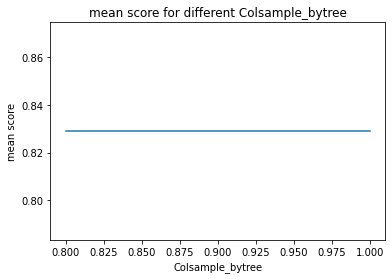

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

temp_array = []
for mean, param in zip(means, params):
  if param["learning_rate"]== grid_search.best_params_['learning_rate'] and param["N_estimator"]==grid_search.best_params_['N_estimator'] and param["Max_depth"]==grid_search.best_params_['Max_depth'] :    
    temp_array.append(mean)
    print("%r %r" % (mean, param))
 
# plot
pyplot.errorbar(Colsample_bytree, temp_array)

pyplot.title('mean score for different Colsample_bytree')
pyplot.xlabel('Colsample_bytree')
pyplot.ylabel('mean score')